In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import euclidean_distances
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

#https://towardsdatascience.com/random-forest-ca80e56224c1
#https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56

#https://www.kaggle.com/itachi9604/disease-symptom-description-dataset

filename = "dataset.csv"
filename2 = "symptom_Description.csv"
filename3 = "symptom_precaution.csv"
filename4 = "Symptom-severity.csv"

dataDS = pd.read_csv(filename,skipinitialspace = True)
dataDsc = pd.read_csv(filename2, skipinitialspace = True)
dataPrecaution = pd.read_csv(filename3, skipinitialspace = True)
dataWeight = pd.read_csv(filename4, skipinitialspace = True)

UniqueDiseases = dataDS['Disease'].value_counts()
UniqueDiseases

Symp = dataWeight['Symptom']
Weight = dataWeight['weight']

#newData = dataDS[['Disease','Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6']]

#newData.replace(' ', '',regex=True,inplace=True)

#for i in range(len(newData)):
#    for n in range (len(newData.columns)):
#        for S in range (len(Symp)):
#            if newData.iat[i,n] == Symp[S]:
#                newData.iat[i,n] = Weight[S]
                
#newData


HepData = dataDS[(dataDS['Disease']=='Hepatitis C')|
                  (dataDS['Disease']=='Hepatitis E')|
                  (dataDS['Disease']=='Hepatitis D')|
                  (dataDS['Disease']=='Hepatitis B')|
                  (dataDS['Disease']=='hepatitis A')]


HepData.replace(' ', '',regex=True,inplace=True)

HepData

C:\Users\madsb\AppData\Local\Temp\ipykernel_18720\1790315045.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HepData.replace(' ', '',regex=True,inplace=True)


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
190,hepatitisA,joint_pain,vomiting,yellowish_skin,dark_urine,nausea,loss_of_appetite,abdominal_pain,diarrhoea,mild_fever,yellowing_of_eyes,muscle_pain,NaN,NaN,NaN,NaN,NaN,NaN
191,hepatitisA,joint_pain,vomiting,yellowish_skin,dark_urine,nausea,loss_of_appetite,abdominal_pain,diarrhoea,mild_fever,yellowing_of_eyes,muscle_pain,NaN,NaN,NaN,NaN,NaN,NaN
192,hepatitisA,vomiting,yellowish_skin,dark_urine,nausea,loss_of_appetite,abdominal_pain,diarrhoea,mild_fever,yellowing_of_eyes,muscle_pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,hepatitisA,joint_pain,yellowish_skin,dark_urine,nausea,loss_of_appetite,abdominal_pain,diarrhoea,mild_fever,yellowing_of_eyes,muscle_pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,hepatitisA,joint_pain,vomiting,dark_urine,nausea,loss_of_appetite,abdominal_pain,diarrhoea,mild_fever,yellowing_of_eyes,muscle_pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,hepatitisA,joint_pain,vomiting,yellowish_skin,dark_urine,nausea,loss_of_appetite,abdominal_pain,diarrhoea,mild_fever,yellowing_of_eyes,muscle_pain,NaN,NaN,NaN,NaN,NaN,NaN
4899,HepatitisB,itching,fatigue,lethargy,yellowish_skin,dark_urine,loss_of_appetite,abdominal_pain,yellow_urine,yellowing_of_eyes,malaise,receiving_blood_transfusion,receiving_unsterile_injections,NaN,NaN,NaN,NaN,NaN
4900,HepatitisC,fatigue,yellowish_skin,nausea,loss_of_appetite,yellowing_of_eyes,family_history,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4901,HepatitisD,joint_pain,vomiting,fatigue,yellowish_skin,dark_urine,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
cols = [i for i in HepData.iloc[:,1:].columns]
cols

['Symptom_1',
 'Symptom_2',
 'Symptom_3',
 'Symptom_4',
 'Symptom_5',
 'Symptom_6',
 'Symptom_7',
 'Symptom_8',
 'Symptom_9',
 'Symptom_10',
 'Symptom_11',
 'Symptom_12',
 'Symptom_13',
 'Symptom_14',
 'Symptom_15',
 'Symptom_16',
 'Symptom_17']

In [40]:
tmp = pd.melt(HepData.reset_index() ,id_vars = ['index'], value_vars = cols )
tmp['add'] = 1
df = pd.pivot_table(tmp, values = 'add',index = 'index', columns = 'value')
df.insert(0,'label',HepData['Disease'])
df = df.fillna(0)
df.head()

value,label,abdominal_pain,acute_liver_failure,coma,dark_urine,diarrhoea,family_history,fatigue,high_fever,itching,...,mild_fever,muscle_pain,nausea,receiving_blood_transfusion,receiving_unsterile_injections,stomach_bleeding,vomiting,yellow_urine,yellowing_of_eyes,yellowish_skin
index,,,,,,,,,,,,,,,,,,,,,
190,hepatitisA,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
191,hepatitisA,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
192,hepatitisA,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
193,hepatitisA,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
194,hepatitisA,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [41]:
ClassY = df['label']
ClassY

index
190     hepatitisA
191     hepatitisA
192     hepatitisA
193     hepatitisA
194     hepatitisA
           ...    
4898    hepatitisA
4899    HepatitisB
4900    HepatitisC
4901    HepatitisD
4902    HepatitisE
Name: label, Length: 600, dtype: object

In [42]:
disease = {'hepatitisA':0,'HepatitisB':1,'HepatitisC':2,'HepatitisD':3,'HepatitisE':4}
df.replace({'label':disease},inplace = True)


In [55]:

from sklearn.ensemble import RandomForestClassifier
datanewMartinHEPATITS = pd.read_csv("RegularData.csv",skipinitialspace = True)
datanewMartinHEPATITS = datanewMartinHEPATITS.drop('Unnamed: 0', axis=1)
#X = datanewMartinHEPATITS.drop('Disease', axis=1)
#y = datanewMartinHEPATITS['Disease']


X = df.drop("label",axis = 1)
y = df['label']



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.20)



model=RandomForestClassifier(n_estimators=200, max_depth=2, max_features=1)

cv = KFold(n_splits=5, shuffle=False)
model.fit(X_train,y_train)

estimator = model.estimators_[5]


In [56]:
score = cross_val_score(model, X_test, y_test, cv = cv)
print("Accuracy:",(sum(score)/5)*100)


Accuracy: 100.0


In [57]:
y_pred_test = model.predict(X_test)
accuracy_score(y_test, y_pred_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        27

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': [1,2,3,4,5,6,7,8],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [200, 500]})

In [47]:
CV_rfc.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 1, 'n_estimators': 200}

In [50]:
rfc1=RandomForestClassifier(random_state=42, max_features=1, n_estimators= 200, max_depth=4, criterion='gini')
rfc1.fit(x_train, y_train)
pred=rfc1.predict(x_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))


Accuracy for Random Forest on CV data:  1.0


Text(0.5, 0, 'max_features')

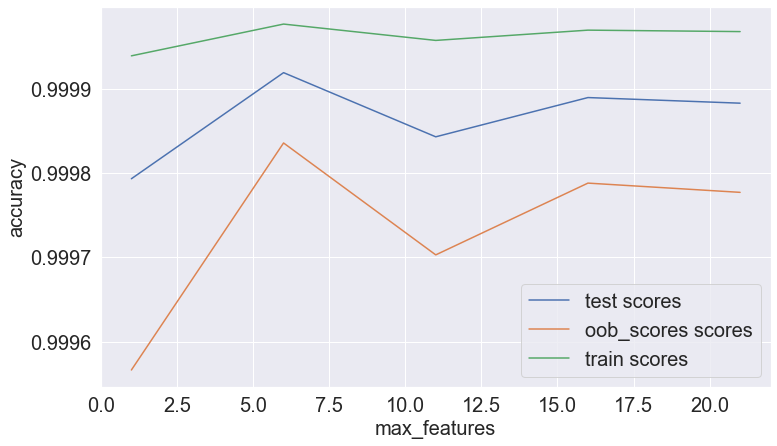

In [58]:
train_scores = []
test_scores = []
oob_scores = []

feature_range = range(1, 24, 5)
for max_features in feature_range:
    rf = RandomForestRegressor(max_features=max_features, oob_score=True, n_estimators=200, random_state=0)
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))
    oob_scores.append(rf.oob_score_)
    
plt.figure(figsize=(12,7))
plt.plot(feature_range, test_scores, label="test scores")
plt.plot(feature_range, oob_scores, label="oob_scores scores")
plt.plot(feature_range, train_scores, label="train scores")
plt.legend(fontsize=20, loc='best')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.ylabel("accuracy", fontsize=20)
plt.xlabel("max_features", fontsize=20)

In [59]:
# Make predictions for the test set
y_pred_test = model.predict(X_test)
y_pred_test
accuracy_score(y_test, y_pred_test)

confusion_matrix(y_test, y_pred_test)

array([[23,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0],
       [ 0,  0, 18,  0,  0],
       [ 0,  0,  0, 27,  0],
       [ 0,  0,  0,  0, 27]], dtype=int64)

ExtraTreesClassifier()


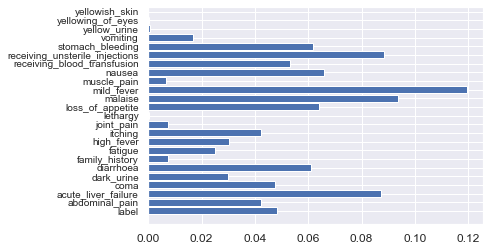

In [60]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
plt.barh(range(23), etc.feature_importances_)
plt.yticks(range(24), df.columns)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=10)
print(etc)

Feature: 0, Score: 0.05867
Feature: 1, Score: 0.02155
Feature: 2, Score: 0.08049
Feature: 3, Score: 0.02611
Feature: 4, Score: 0.04191
Feature: 5, Score: 0.07483
Feature: 6, Score: 0.02029
Feature: 7, Score: 0.04087
Feature: 8, Score: 0.02515
Feature: 9, Score: 0.04632
Feature: 10, Score: 0.01486
Feature: 11, Score: 0.00061
Feature: 12, Score: 0.05618
Feature: 13, Score: 0.08721
Feature: 14, Score: 0.09987
Feature: 15, Score: 0.00700
Feature: 16, Score: 0.05096
Feature: 17, Score: 0.06574
Feature: 18, Score: 0.10447
Feature: 19, Score: 0.05174
Feature: 20, Score: 0.02412
Feature: 21, Score: 0.00092
Feature: 22, Score: 0.00015


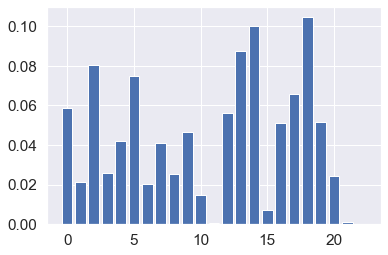

In [62]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
modelwork = RandomForestClassifier()
modelwork.fit(X,y)
importance = modelwork.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
score = cross_val_score(etc, X_test, y_test, cv = cv)
print("Accuracy:",(sum(score)/5)*100)

In [ ]:
Tree = model.estimators_[50]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

In [ ]:
#from sklearn.tree import plot_tree
#fig = plt.figure(figsize=(15, 10))
#fig = plt.figure(figsize=(15, 10))
#lot_tree(model.estimators_[0], 
         # feature_names=X.columns,
          #class_names=ClassY, 
          #filled=True, impurity=True, 
          #rounded=True)
#fig.savefig('Hepa_Tree.png')

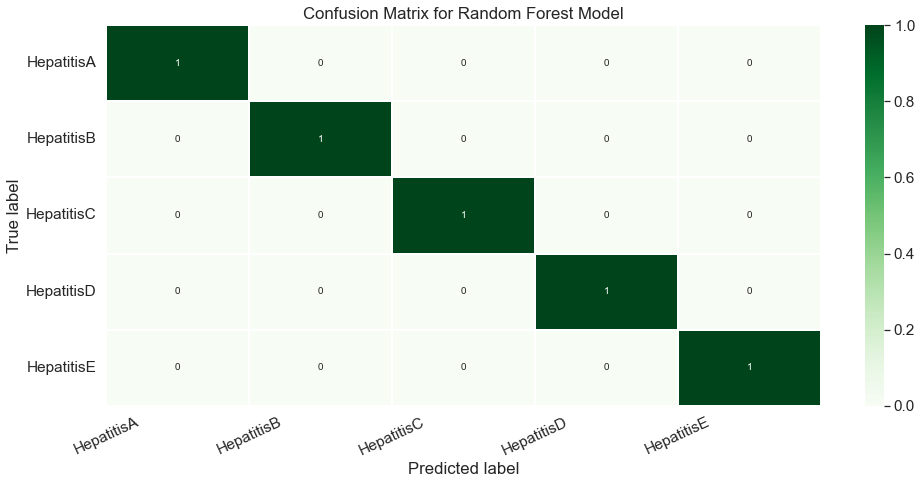

In [61]:
# Get and reshape confusion matrix data


matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['HepatitisA','HepatitisB','HepatitisC','HepatitisD','HepatitisE']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()